# 활성화 함수 기초

## 참고자료
https://excelsior-cjh.tistory.com/177<br>
https://reniew.github.io/12/

In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### 딥러닝에서 사용하는 활성화 함수

딥러닝 네트워크에서는 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고 주로 비선형 함수를 통과시킨 후 전달한다.<br>
이때 사용하는 함수를 활성화 함수(Activation Function) 이라 부른다.

-> **여기서 주로 비선형 함수를 사용하는 이유는 선형함수를 사용할 시 층을 깊게 하는 의미가 줄어들기 때문이다.**

선형함수인 h(x)=cx를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요. 이를 식으로 나타내면 y(x)=h(h(h(x)))가 된다. 이는 실은 y(x)=ax와 똑같은 식입니다. a=c3이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다. 뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. <br>
-> 선형함수 사용시 복잡해지지 않는다.

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
sess = tf.Session()

In [10]:
W1 = tf.Variable(tf.random_normal([10,10],stddev=0.001)) 

In [32]:
data = np.reshape(np.arange(0,100),[10,10])

In [33]:
data.astype(np.float32)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69.],
       [70., 71., 72., 73., 74., 75., 76., 77., 78., 79.],
       [80., 81., 82., 83., 84., 85., 86., 87., 88., 89.],
       [90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]], dtype=float32)

In [34]:
x = tf.placeholder(tf.float32,[None,10])

In [35]:
W2 = tf.Variable(tf.random_normal(shape=[10,10]))

In [36]:
sess.run(tf.global_variables_initializer())
sess.run(tf.matmul(x,W2),feed_dict={x:data})

array([[-1.89209671e+01, -3.60775909e+01, -2.88780951e+00,
         5.61304951e+00,  3.15607758e+01, -5.52908897e-01,
         1.10753231e+01, -8.01236439e+00, -2.04738026e+01,
        -1.43853407e+01],
       [-6.23028221e+01, -1.16300125e+02,  3.16170368e+01,
         1.21440744e+01,  1.09250557e+02,  6.79110670e+00,
         1.87874050e+01, -1.10647631e+01, -6.76094208e+01,
        -2.63124847e+01],
       [-1.05684669e+02, -1.96522675e+02,  6.61218872e+01,
         1.86750984e+01,  1.86940338e+02,  1.41351223e+01,
         2.64994888e+01, -1.41171637e+01, -1.14745041e+02,
        -3.82396278e+01],
       [-1.49066513e+02, -2.76745209e+02,  1.00626732e+02,
         2.52061195e+01,  2.64630127e+02,  2.14791374e+01,
         3.42115669e+01, -1.71695614e+01, -1.61880646e+02,
        -5.01667747e+01],
       [-1.92448380e+02, -3.56967712e+02,  1.35131592e+02,
         3.17371464e+01,  3.42319946e+02,  2.88231525e+01,
         4.19236488e+01, -2.02219582e+01, -2.09016281e+02,
        -6.

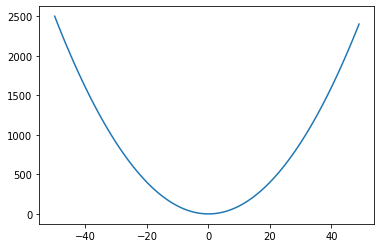

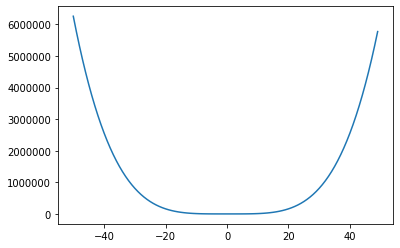

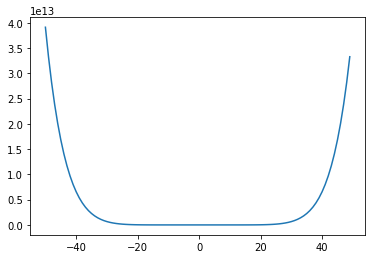

In [12]:
x = np.arange(-50,50)
square_func = np.square(x)+1
plt.plot(x,square_func)
plt.show()

square_func = np.square(square_func)+1
plt.plot(x,square_func)
plt.show()

square_func = np.square(square_func)+1
plt.plot(x,square_func)
plt.show()

# 1. 시그모이드 함수 (Sigmoid)
시그모이드 함수는 Logistic 함수라 불리기도한다. <br>
선형인 멀티퍼셉트론에서 비선형 값을 얻기 위해 사용하기 시작했다. 함수는 아래와 같이 구성된다.

$$σ(x) = {-1 \over {1+e^{-x}}}$$

$$σ^{'}(x)= {σ(x)*(1-σ(x))}$$

![](https://mlnotebook.github.io/img/transferFunctions/sigmoid.png)

sigmoid는 신경망 초기에는 많이 사용되었지만, NeuralNet에서 여러 문제점이 발생하기 때문에 사용하지 않는다.

- **Gradient Vanishing** 현상이 발생한다. 미분함수에 대해 x=0에서 최대값 14을 가지고, 
input값이 일정이상 올라가면 미분값이 거의 0에 수렴하게된다.<br> 이는 |x|
값이 커질 수록 Gradient Backpropagation시 미분값이 소실될 가능성이 크다.


- **함수값 중심이 0이 아니다.** 함수값 중심이 0이 아니라 학습이 느려질 수 있다. 그 이유를 알아보면, 만약 모든 x
값들이 같은 부호(ex. for all x
 is positive) 라고 가정하고 아래의 파라미터 w
에 대한 미분함수식을 살펴보자. ∂L/∂w=∂L/∂a * ∂a/∂w 
 그리고 ∂a/∂w=x
이기 때문에, ∂L/∂w=∂L/∂a * x
이다. <br>위 식에서 모든 x
가 양수라면 결국 ∂L/∂w
는 ∂L/∂a
 부호에 의해 결정된다. 따라서 한 노드에 대해 모든 파라미터w
의 미분값은 모두 같은 부호를 같게된다.<br>따라서 **같은 방향으로 update되는데 이러한 과정은 학습을 zigzag 형태로 만들어 느리게 만드는 원인**이 된다.


- **exp 함수 사용시 비용이 크다.**

![](https://mlnotebook.github.io/img/transferFunctions/dsigmoid.png)

# 2. tanh함수, (Hyperbolic tangent function)
하이퍼볼릭탄젠트란 쌍곡선 함수중 하나이다.

쌍곡선 함수 : 쌍곡선 함수란 삼각함수와 유사한 성질을 가지고, 표준 쌍곡선을 매개변수로 표시할 때 나오는 함수이다.<br>
하이퍼볼릭탄젠트 함수는 시그모이드 함수를 transformation해서 얻을 수 있다.

함수는 다음과 같이 정의된다.

$$tanh(x) = {2σ(2x)-1}$$

$$tanh(x) = {{e^x - e^{-x}}\over{e^x + e^{-x}}}$$

$$tanh^{'}(x) = {1 - tanh^2(x)}$$

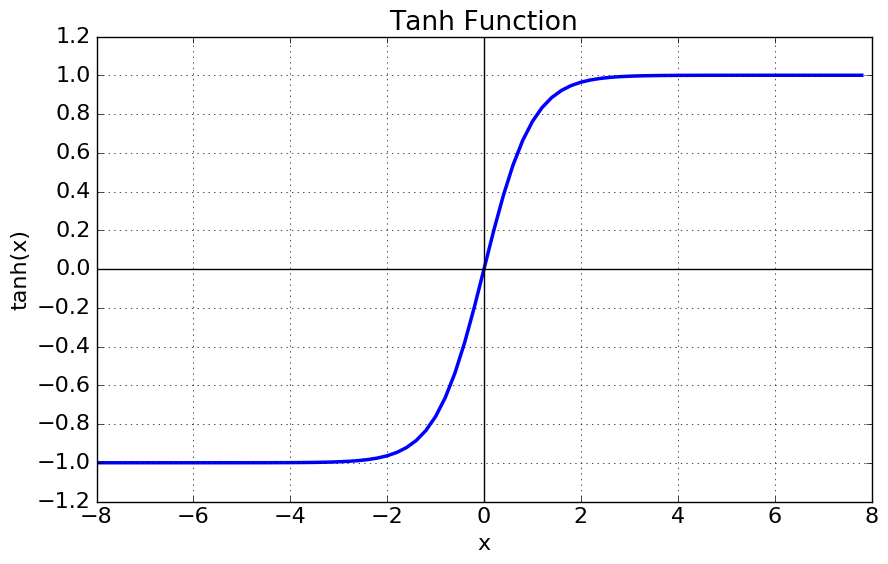

In [16]:
Image('https://mlnotebook.github.io/img/transferFunctions/tanh.png',width=500)

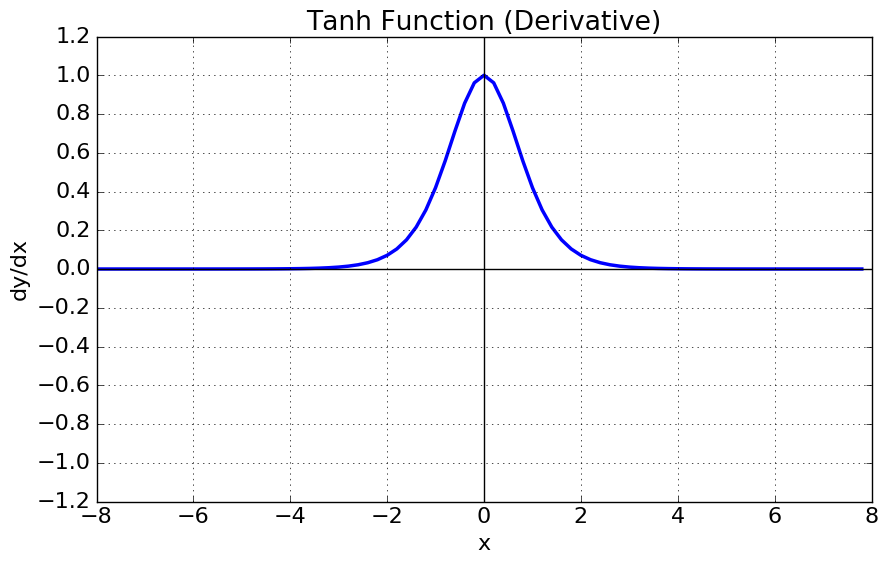

In [15]:
Image('https://mlnotebook.github.io/img/transferFunctions/dtanh.png',width=500)

- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결했다.<br>
- 하지만 미분함수에 대해 일정값 이상 커질시 미분값이 소실되는 gradient vanishing 문제는 여전히 남아있다.

# 3. ReLU 함수 (Rectified Linear Unit)

ReLu함수는 최근 가장 많이 사용되는 활성화 함수이다. 함수는 아래와 같이 정의된다.

$$f(x) = {max(0,1)}$$
$$f(x) = {{1 \ (x>0)}\over{0 \ (x<0)}}$$

## ReLU함수의 특징

- x>0 이면 기울기가 1인 직선이고, x<0 이면 함수값이 0이된다.
- sigmoid, tanh 함수와 비교시 학습이 훨씬 빨라진다.
- 연산 비용이 크지않고, 구현이 매우 간단하다.
- x<0인 값들에 대해서는 기울기가 0이기 때문에 뉴런이 죽을 수 있는 단점이 존재한다.

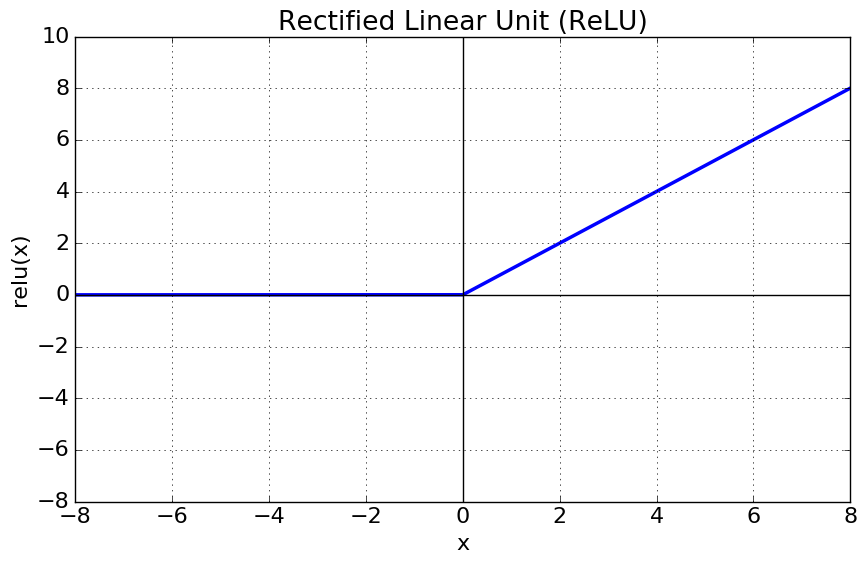

In [18]:
Image("https://mlnotebook.github.io/img/transferFunctions/relu.png",width=500)

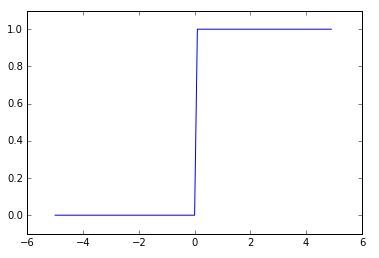

In [23]:
Image("http://snowdeer.github.io/assets/machine-learning/009.jpg",width=520)

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [23]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [2]:
import tensorflow as tf
import numpy as np

In [33]:
tf.reset_default_graph()

In [1]:
x_train.shape

NameError: name 'x_train' is not defined

In [39]:
# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

(60000, 28, 28)


In [7]:
np.random.normal(scale=1,size=[10])

array([-0.43513752, -0.49091041,  0.5331596 , -1.67324885,  0.64825023,
        0.80286771,  0.93877881,  0.96432993, -0.07432727,  0.85706872])

In [11]:
name = np.arange(0,0.1,1000)

In [12]:
name

array([0.])

In [ ]:
np.range(s)